<a href="https://colab.research.google.com/github/kven30/portfolio/blob/main/Karthik_classification__smaller__project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks

import tensorflow as tf


In [ ]:
data = pd.read_csv('/content/TCGA_InfoWithGrade.csv')

In [ ]:
data


,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,1,1,77.89,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
835,1,0,85.18,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
836,1,1,77.49,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
837,1,0,63.33,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             839 non-null    int64  
 1   Gender            839 non-null    int64  
 2   Age_at_diagnosis  839 non-null    float64
 3   Race              839 non-null    int64  
 4   IDH1              839 non-null    int64  
 5   TP53              839 non-null    int64  
 6   ATRX              839 non-null    int64  
 7   PTEN              839 non-null    int64  
 8   EGFR              839 non-null    int64  
 9   CIC               839 non-null    int64  
 10  MUC16             839 non-null    int64  
 11  PIK3CA            839 non-null    int64  
 12  NF1               839 non-null    int64  
 13  PIK3R1            839 non-null    int64  
 14  FUBP1             839 non-null    int64  
 15  RB1               839 non-null    int64  
 16  NOTCH1            839 non-null    int64  
 1

In [ ]:
#Removes sets input and output columns (output = GRADE)
input_cols=data.columns.tolist()
input_cols.remove('Grade')
output_col='Grade'
data = data[input_cols + [output_col]]
#spits data (train test split)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data[input_cols], data[output_col], train_size = 0.9)

In [ ]:
sc = MinMaxScaler()
sc.fit(X_train_1)

#transforms train and test data
X_train = sc.transform(X_train_1)
X_test_1 = sc.transform(X_test_1)


# Creates Dataframes out of train and test
X_train_1 = pd.DataFrame(X_train_1, columns=input_cols)
X_test_1 = pd.DataFrame(X_test_1, columns=input_cols)


# Layers
prediction_layer_1 = tf.keras.layers.Dense(units=1, activation='sigmoid')
inputs = tf.keras.Input(shape=(len(input_cols),))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.3)(inputs)
x = tf.keras.layers.BatchNormalization()(x)
outputs = prediction_layer_1(x)
simple_model = tf.keras.Model(inputs, outputs)


#callbacks

nn_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
nn_plateau_monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.1)


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.BinaryCrossentropy()

#creates a metric for binary accuracy
nn_accuracy = tf.keras.metrics.BinaryAccuracy()

#compiles
simple_model.compile(optimizer=optimizer, loss=loss, metrics=[nn_accuracy])


nn_history = simple_model.fit(X_train_1, y_train_1, epochs=200, validation_split=0.2, verbose=1, callbacks=[nn_early_stopping, nn_plateau_monitor])


Epoch 1/200
19/19 [==============================] - 1s 17ms/step - loss: 0.7427 - binary_accuracy: 0.5563 - val_loss: 0.7259 - val_binary_accuracy: 0.4636 - lr: 0.0010
Epoch 2/200
19/19 [==============================] - 0s 5ms/step - loss: 0.7265 - binary_accuracy: 0.5579 - val_loss: 0.6837 - val_binary_accuracy: 0.5497 - lr: 0.0010
Epoch 3/200
19/19 [==============================] - 0s 4ms/step - loss: 0.6968 - binary_accuracy: 0.5993 - val_loss: 0.6587 - val_binary_accuracy: 0.6026 - lr: 0.0010
Epoch 4/200
19/19 [==============================] - 0s 4ms/step - loss: 0.6584 - binary_accuracy: 0.6192 - val_loss: 0.6406 - val_binary_accuracy: 0.6159 - lr: 0.0010
Epoch 5/200
19/19 [==============================] - 0s 4ms/step - loss: 0.6479 - binary_accuracy: 0.6407 - val_loss: 0.6261 - val_binary_accuracy: 0.6358 - lr: 0.0010
Epoch 6/200
19/19 [==============================] - 0s 5ms/step - loss: 0.6583 - binary_accuracy: 0.6175 - val_loss: 0.6136 - val_binary_accuracy: 0.6490 - lr

In [ ]:
nn_prediction = simple_model.predict(X_test_1) # This will return a numpy array.
print(nn_prediction)

3/3 [==============================] - 0s 4ms/step
[[4.5038214e-01]
 [1.5364347e-01]
 [7.4648178e-01]
 [6.0087860e-01]
 [5.8589205e-02]
 [6.3105315e-02]
 [7.3094326e-01]
 [1.9347486e-01]
 [5.1042014e-01]
 [5.0769627e-01]
 [5.0807947e-01]
 [6.5558749e-01]
 [7.9152817e-01]
 [5.8717430e-02]
 [5.8949955e-02]
 [4.8790714e-01]
 [4.8746783e-01]
 [7.1711677e-01]
 [1.6607524e-01]
 [1.5492441e-01]
 [2.1381424e-01]
 [4.5028123e-01]
 [2.8374556e-02]
 [7.4128866e-02]
 [2.8325694e-02]
 [5.8619980e-02]
 [7.6294887e-01]
 [7.1114445e-01]
 [7.1735698e-01]
 [7.3025274e-01]
 [6.3243151e-02]
 [6.3893867e-01]
 [5.2947956e-01]
 [6.1834536e-02]
 [2.8286755e-02]
 [7.6941109e-01]
 [8.5691589e-01]
 [7.4915498e-01]
 [7.6156712e-01]
 [4.8611507e-01]
 [1.6445366e-01]
 [7.6185477e-01]
 [7.4686122e-01]
 [4.5025328e-01]
 [4.5039424e-01]
 [2.0064178e-01]
 [5.1381171e-01]
 [5.8592118e-02]
 [6.3158765e-02]
 [2.3583724e-04]
 [8.5267995e-04]
 [4.3025020e-01]
 [2.8888354e-01]
 [4.5050129e-01]
 [5.6638968e-01]
 [6.3207336e-0

In [ ]:
#rounds previous predictions
nn_prediction_decision = np.round(nn_prediction)
print(nn_prediction_decision)

[[0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


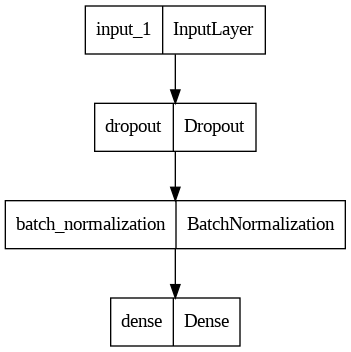

In [ ]:
tf.keras.utils.plot_model(simple_model)

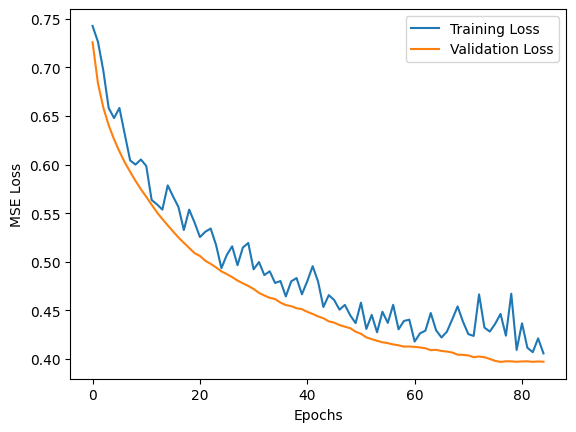

In [ ]:
plt.figure()
plt.plot(nn_history.history['loss'], label='Training Loss')
plt.plot(nn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

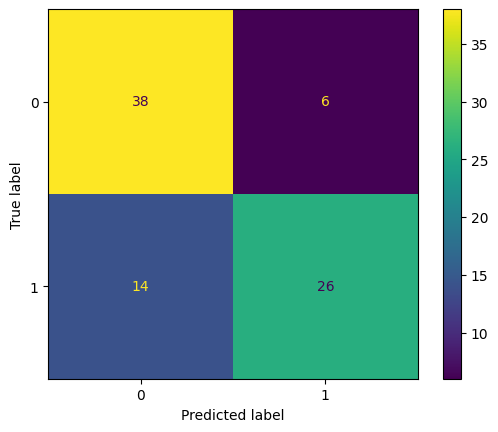

In [ ]:
#confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_1, nn_prediction_decision)
plt.show()

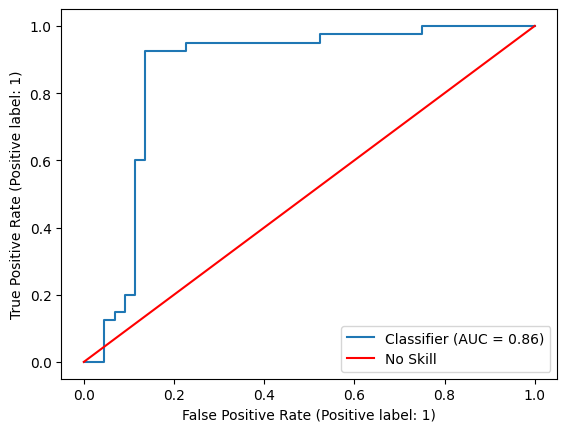

In [ ]:
#ROC curve
RocCurveDisplay.from_predictions(y_test_1, nn_prediction)
plt.plot([0, 1], [0, 1], c='r', label='No Skill')
plt.legend()
plt.show()

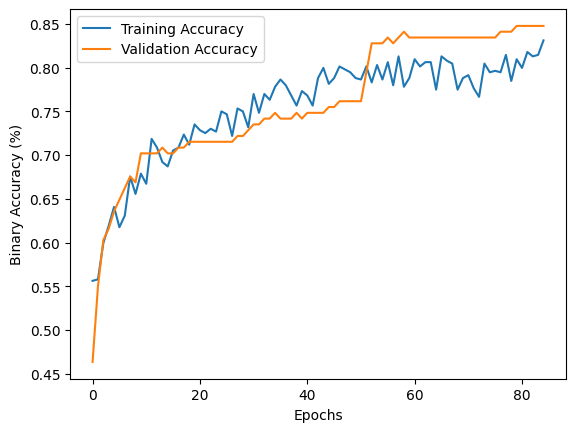

In [ ]:
#Accuracy vs epochs plot

plt.figure()
plt.plot(nn_history.history['binary_accuracy'], label='Training Accuracy')
plt.plot(nn_history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Binary Accuracy (%)')
plt.legend()
plt.show()